# Opening the dataframes and making copies:

In [1]:
import pandas as pd

# orders.csv (Cleaned orders dataset)
url = "https://drive.google.com/file/d/1NHCSWriDURGeBZRTHR7V8rBjux97Mepb/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines.csv (Cleaned orderlines dataset)
url = "https://drive.google.com/file/d/1-PotWfEh6xNah75Vx0vpfNOAZRKAtPT6/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

# products_cl.csv (Cleaned products dataset)
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/16nZV6qci-RdTSZ1D3NsPuxU5NFG1V_5a/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Creating a copy of above dataframes
brands_df = brands.copy()
products_df = products_cl.copy()
orders_df = orders.copy()
orderlines_df = orderlines.copy()

## Changing the dates to datetime format:

In [2]:
orders_df['created_date'] = pd.to_datetime(orders_df['created_date'])
orderlines_df['date'] = pd.to_datetime(orderlines_df['date'])
products_df["type"] = products_df["type"].astype(str)

## Creating product categories for analysis:

create_categories function:

In [3]:
def create_categories(prod_df):
    prod_df["category"] = ""
    prod_df["category"].eq("").sum()
    # Acessories
    prod_df.loc[prod_df["desc"].str.contains("cable|connector|lightning to usb|wall socket|power strip", case=False), "category"] = "accessories" #cable
    prod_df.loc[prod_df["desc"].str.contains("case|funda|housing|casing|folder", case=False), "category"] = "accessories" #case from description
    prod_df.loc[prod_df["name"].str.contains("case|funda|housing|casing|folder", case=False), "category"] = "accessories" #case from name
    prod_df.loc[prod_df["desc"].str.contains("dock|hub|connection|expansion box", case=False), "category"] = "accessories" #dock
    prod_df.loc[prod_df["desc"].str.contains("strap|armband|belt|bracelet", case=False), "category"] = "accessories" # strap
    prod_df.loc[prod_df["desc"].str.contains("stand|support", case=False), "category"] = "accessories" #stand
    prod_df.loc[prod_df["desc"].str.contains("charger", case=False), "category"] = "accessories" #charger
    prod_df.loc[prod_df["desc"].str.contains("adapter", case=False), "category"] = "accessories" #adapter
    prod_df.loc[prod_df["desc"].str.contains("protect|cover|sleeve|screensaver|shell", case=False), "category"] = "accessories" #protection
    # Many multiple small
    prod_df.loc[prod_df["desc"].str.contains("flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion", case=False), "category"] = "storage"
    prod_df.loc[prod_df["name"].str.contains("flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion", case=False), "category"] = "storage"
    prod_df.loc[prod_df["desc"].str.contains("battery", case=False), "category"] = "battery"
    prod_df.loc[prod_df["desc"].str.contains("headset|headphones", case=False), "category"] = "headset"
    prod_df.loc[prod_df["desc"].str.contains("backpack", case=False), "category"] = "backpack"
    prod_df.loc[prod_df["desc"].str.contains("keyboard", case=False), "category"] = "keyboard"
    prod_df.loc[prod_df["desc"].str.contains("mouse|trackpad", case=False), "category"] = "mouse"
    prod_df.loc[prod_df["desc"].str.contains("^.{0,7}ram", case=False), "category"] = "ram"
    prod_df.loc[prod_df["desc"].str.contains("scale", case=False), "category"] = "scale"
    prod_df.loc[prod_df["desc"].str.contains("thermometer", case=False), "category"] = "thermometer"
    prod_df.loc[prod_df["desc"].str.contains("monitor", case=False), "category"] = "monitor"
    prod_df.loc[prod_df["desc"].str.contains("speaker|music system", case=False), "category"] = "speaker"
    prod_df.loc[prod_df["desc"].str.contains("camera", case=False), "category"] = "camera"
    prod_df.loc[prod_df["desc"].str.contains("pointer", case=False), "category"] = "pointer"
    # Smartphones
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}apple iphone", case=False), "category"] = 'smartphone'
    prod_df.loc[prod_df["name"].str.contains("Like new - Apple iPhone", case=False), "category"] = 'smartphone'
    prod_df.loc[prod_df["name"].str.contains("Second hand - Apple iPhone", case=False), "category"] = 'smartphone'
    # Desktops and laptops
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}imac|^.{0,7}mac mini|^.{0,7}mac pro", case=False), "category"] = 'computer'
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}Apple imac", case=False), "category"] = 'computer'
    prod_df.loc[prod_df["name"].str.contains("Like new - Apple iMac", case=False), "category"] = 'computer'
    prod_df.loc[prod_df["name"].str.contains("Second hand - Apple iMac", case=False), "category"] = 'computer'
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}MacBook", case=False), "category"] = "computer"
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}Apple MacBook", case=False), "category"] = "computer"
    prod_df.loc[prod_df["name"].str.contains("Like new - Apple Macbook", case=False), "category"] = "computer"
    prod_df.loc[prod_df["name"].str.contains("Second hand - Apple Macbook", case=False), "category"] = "computer"
    # Tablets, ipods and smartwatches
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] = "tablet"
    prod_df.loc[prod_df["name"].str.contains("Like new - Apple iPad", case=False), "category"] = "tablet"
    prod_df.loc[prod_df["name"].str.contains("Second hand - Apple iPad", case=False), "category"] = "tablet"
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] = "ipod"
    prod_df.loc[prod_df["name"].str.contains("Like new - Apple iPod", case=False), "category"] = "ipod"
    prod_df.loc[prod_df["name"].str.contains("Second hand - Apple iPod", case=False), "category"] = "ipod"
    prod_df.loc[prod_df["name"].str.contains("^.{0,7}apple watch", case=False), "category"] = "smartwatch"
    prod_df.loc[prod_df["name"].str.contains("Like new - Apple watch", case=False), "category"] = "smartwatch"
    prod_df.loc[prod_df["name"].str.contains("Second hand - Apple watch", case=False), "category"] = "smartwatch"
    prod_df.loc[prod_df["desc"].str.contains("^.{0,6}apple watch|smartwatch|smart watch", case=False), "category"] = "smartwatch"
    # Servers
    prod_df.loc[prod_df["desc"].str.contains("nas|server|raid|synology", case=False), "category"] = "computer"
    # Services
    prod_df.loc[prod_df["name"].str.contains("repair|service", case=False), "category"] = "services"
    # Based on type
    prod_df.loc[prod_df["type"].str.contains("11865403"),"category"] = "accessories" #cases and protection
    prod_df.loc[prod_df["type"].str.contains("1298"),"category"] = "accessories" #support
    prod_df.loc[prod_df["type"].str.contains("13615399"),"category"] = "accessories" #dock
    prod_df.loc[prod_df["type"].str.contains("12175397"),"category"] = "computer"
    prod_df.loc[prod_df["type"].str.contains("14305406"),"category"] = "other"
    prod_df.loc[prod_df["type"].str.contains("1231"),"category"] = "other"
    prod_df.loc[prod_df["type"].str.contains("13835403"),"category"] = "case"
    prod_df.loc[prod_df["type"].str.contains("1392"),"category"] = "backpack"
    prod_df.loc[prod_df["type"].str.contains("2449"),"category"] = "accessories"
    prod_df.loc[prod_df["type"].str.contains("101781405"),"category"] = "other"

    # EXTRA
    prod_df.loc[prod_df["desc"].str.contains("case|funda|housing|casing|folder", case=False), "category"] = "accessories" #case
    prod_df.loc[prod_df["name"].str.contains("case|funda|housing|casing|folder", case=False), "category"] = "accessories" #case
    prod_df.loc[prod_df["desc"].str.contains("protect|cover|sleeve|screensaver|shell", case=False), "category"] = "accessories" #protection
    prod_df.loc[prod_df["desc"].str.contains("camera", case=False), "category"] = "camera" #camera


    # Other
    prod_df.loc[prod_df["category"] == "", "category"] += "other"
    # New column for refurbished
    prod_df["refurbished"] = 0
    prod_df.loc[prod_df["desc"].str.contains("refurbished|reconditioned|like new|second hand", case=False), "refurbished"] = 1

    return prod_df

Using create_categories function:

In [4]:
products_df = create_categories(products_df)
products_df.sample(10)

,sku,name,desc,price,in_stock,type,category,refurbished
2256,TRI0028,Tribe External Battery Power Bank 2600 mAh Min...,2600mAh external battery for iPhone small and ...,19.99,0,1515,battery,0
7403,APP2332,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Touch Bar to 31GHz Cor...,3159.00,0,"1,02E+12",computer,0
1979,ADO0081,Adobe Illustrator CC -gráficos-,Software Adobe Illustrator CC for Mac and PC.,435.45,0,1416,other,0
135,DLK0015,D-Link DWA-131 Wireless N Nano USB Adapter,Dlink wireless Nano USB for Mac and PC.,14.99,0,1334,other,0
3538,BAN0008,Panama Band & Strap Watch Strap 42mm Blue Apple,Leather strap for easy installation Apple Watc...,59.00,0,2449,accessories,0
377,WAC0092,Wacom Bamboo Stylus Mini Blue,IPhone iPad and iPod pointer.,9.99,0,1229,pointer,0
2969,PIE0025-A,Open - Internal battery for iPhone 5S,Replacement AC Adapter for Apple iPhone 5S.,19.95,0,1298,accessories,0
5666,APP1900,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,3919.00,0,2158,computer,0
1078,PAC0516,Synology DS115j Pack | Seagate 2TB IronWolf,Synology DS115j NAS Server Pack + 2TB Seagate ...,201.98,0,12175397,computer,0
3514,LAC0175,LaCie Rugged USB 3.0 16GB pendrive Key,PenDrive with rubber 16GB USB 3.0 for Mac and PC.,29.99,0,57445397,storage,0


## Merging the brands to products_df:
(and deleting unnecessary columns)

In [5]:
products_df['brand_code'] = products_df['sku'].str[:3]
products_df = products_df.merge(brands_df, how='left', left_on='brand_code',right_on = 'short')
products_df = products_df.drop(columns=['in_stock','short'])
products_df = products_df.rename(columns={'long': 'brand_name'})

## Merging orderlines with products and creating the discount column:
(and deleting unnecessary columns)


In [6]:
orderlines_products = orderlines_df.merge(products_df,how='left',on='sku')
orderlines_products = orderlines_products.drop(columns=['id','product_id'])
orderlines_products['discount'] = orderlines_products['price'] - orderlines_products['unit_price']
orderlines_products['ratio'] = 100*(orderlines_products['discount']/orderlines_products['price'])
orderlines_products.sample(10)

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,type,category,refurbished,brand_code,brand_name,discount,ratio
12137,357271,1,JBL0123,39.99,2017-05-19 10:27:43,39.99,JBL T450 Bluetooth BT Headset White,Wireless headphones with folding design with 1...,49.95,5384,headset,0,JBL,JBL,9.96,19.939940
36822,457298,1,AP20159,455.59,2017-12-08 11:25:57,455.59,Like new - Apple Mac mini Core i5 14GHz | 4GB ...,Computer Core i5 Mac mini refitted 14GHz | 4GB...,555.49,"5,44E+11",other,0,AP2,Apple,99.90,17.984122
15806,374770,1,MOX0014,10.99,2017-07-09 13:12:43,10.99,Tempered glass 026mm Moxie SE / 5s / 5c / 5,Screensaver tempered glass for SE / 5s / 5c / 5,10.99,13555403,accessories,0,MOX,Moxie,0.00,0.000000
12767,356574,2,PAC0779,269.99,2017-05-29 17:57:59,539.98,Samsung SSD 850 expansion kit PRO 500GB + OWC ...,500GB SSD expansion kit + Adapter Mount Pro fo...,285.98,1433,storage,0,PAC,Pack,15.99,5.591300
34653,447062,1,CRU0050,77.90,2017-11-27 08:35:05,77.90,Crucial MX300 275GB SSD Disk,SSD 275GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,98.39,12215397,storage,0,CRU,Crucial,20.49,20.825287
9821,347915,1,WDT0141,113.99,2017-04-20 17:46:36,113.99,"WD Red 3TB 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 3T...,129.00,12655397,computer,0,WDT,Western Digital,15.01,11.635659
25939,414574,1,APP2479,807.33,2017-10-19 18:49:55,807.33,Apple iPhone 64GB Gold 8,Apple iPhone 64GB 8 in Gold,809.00,113291716,smartphone,0,APP,Apple,1.67,0.206428
1923,306303,1,MOX0019,4.99,2017-01-10 09:43:24,4.99,Moxie Waterproof Case iPhone 6 / 6S Black,Case marine case in water and resistant to dir...,14.99,11865403,accessories,0,MOX,Moxie,10.00,66.711141
45775,493566,1,TRA0048,215.28,2018-01-18 13:45:55,215.28,Transcend JetDrive PCIe SSD 820 240GB,240GB SSD expansion for Macbook Pro Retina Mac...,222.00,12215397,storage,0,TRA,Trascend,6.72,3.027027
10969,352231,1,LAC0212,135.99,2017-05-03 12:50:55,135.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0...,External Hard Drive 4TB 35-inch USB 3.0 for Ma...,139.99,11935397,storage,0,LAC,LaCie,4.00,2.857347


### Ploting the mean ratio (%) per category:

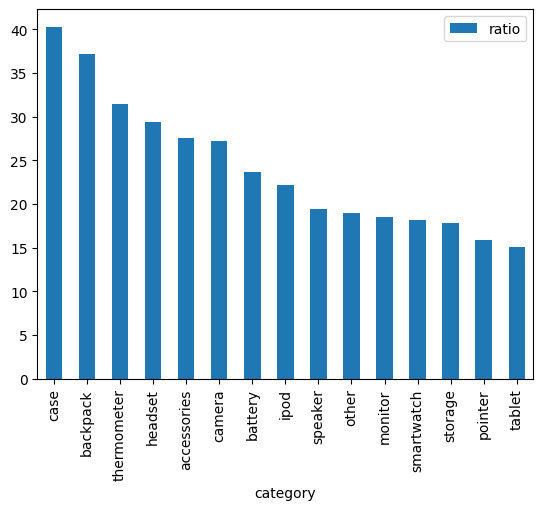

In [7]:
orderlines_products.groupby('category').agg({'ratio':'mean'}).nlargest(15,columns='ratio').plot.bar();

### Ploting the total revenue per category:

Average revenue per category

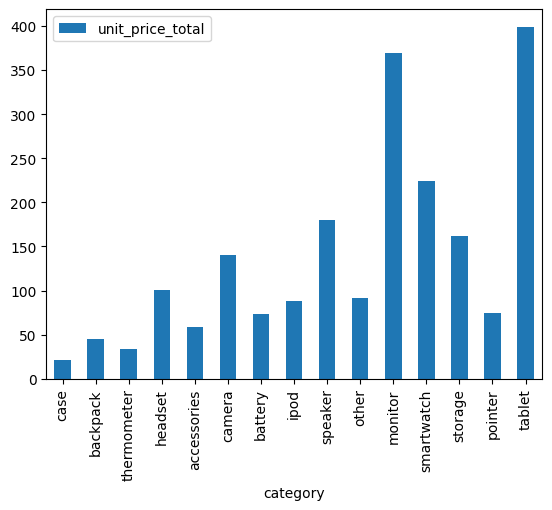

In [8]:
orderlines_products.groupby('category').agg({'unit_price_total':'mean','ratio':'mean'}).nlargest(15,columns='ratio').plot.bar(y='unit_price_total');

Total revenue per category

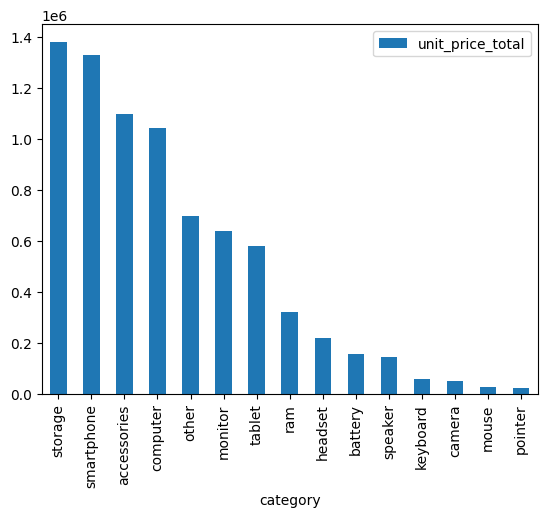

In [9]:
orderlines_products.groupby('category').agg({'unit_price_total':'sum','ratio':'mean'}).nlargest(15,columns='unit_price_total').plot.bar(y='unit_price_total');

### Boxplot with ratio

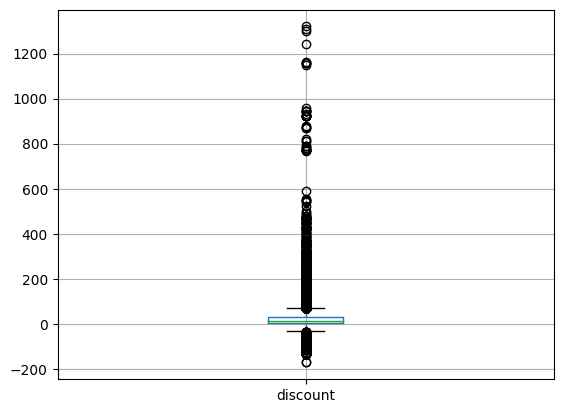

In [10]:
orderlines_products.boxplot(column='discount');

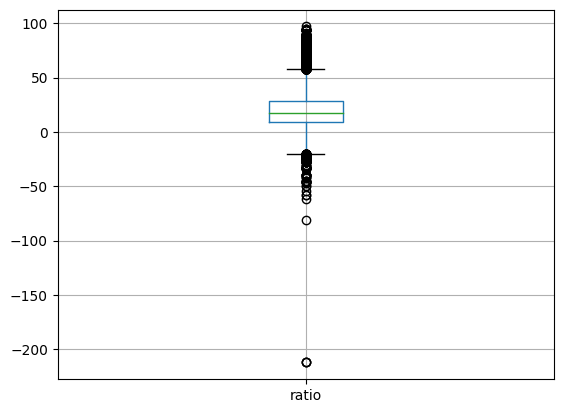

In [11]:
orderlines_products.boxplot(column='ratio');

### Creating price ranges

In [12]:
orderlines_products['price_range'] = ''
orderlines_products.loc[orderlines_products['price']<100,'price_range'] = 'cheap'
orderlines_products.loc[orderlines_products['price'].between(100,400),'price_range'] = 'mid-low'
orderlines_products.loc[orderlines_products['price'].between(400,800),'price_range'] = 'mid-high'
orderlines_products.loc[orderlines_products['price']>800,'price_range'] = 'expensive'

#### Mean ratio per price range



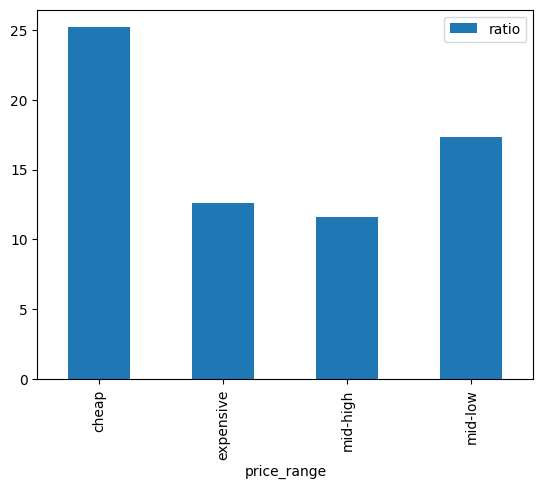

In [13]:
orderlines_products.groupby('price_range').agg({'ratio':'mean'}).plot.bar();

#### Total products sold per price range


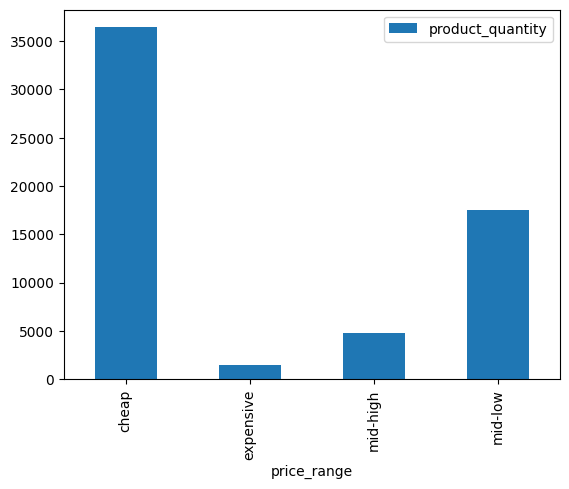

In [14]:
orderlines_products.groupby('price_range').agg({'product_quantity':'sum'}).plot.bar();

#### Total revenue per price range


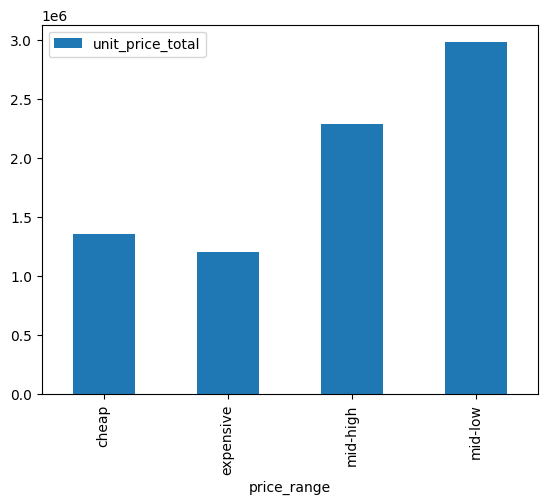

In [15]:
orderlines_products.groupby('price_range').agg({'unit_price_total':'sum'}).plot.bar();

Discount% (ratio) had 2% as negative discounts hence we have ignored it for further analysis

In [16]:
orlinprod_positive = orderlines_products.loc[orderlines_products['ratio'] > 0,:] #Considering only positive ratio (discount%)

In [17]:
orlinprod_positive.sample(10)

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,type,category,refurbished,brand_code,brand_name,discount,ratio,price_range
21693,395952,1,WDT0187,61.58,2017-09-03 13:33:07,61.58,"Blue 1TB WD 25 ""SATA III 5400rpm 8MB 95mm",Internal Hard Drive Western Digital 1TB for Ma...,80.00,12655397,storage,0,WDT,Western Digital,18.42,23.025000,cheap
39748,469338,1,PAC2477,19.99,2017-12-22 09:38:32,19.99,Pack of 2 units Zagg Coda Wireless Headsets Black,Pack 2 Bluetooth wireless headset with autonom...,59.98,5384,headset,0,PAC,Pack,39.99,66.672224,cheap
52244,521001,1,IOT0026,25.99,2018-03-04 20:03:51,25.99,Mini Migo iOttie Palo selfie Black,Selfie stick with Bluetooth 3.0 extensible and...,34.95,11905404,accessories,0,IOT,iOttie,8.96,25.636624,cheap
18574,384339,1,MOX0018,4.99,2017-07-31 10:07:00,4.99,Tempered Glass Screen Protector Moxie Apple Wa...,Screen Protector for Apple Watch tempered glass.,9.99,2425,accessories,0,MOX,Moxie,5.00,50.050050,cheap
29928,429440,1,BEL0371,23.99,2017-11-21 09:14:19,23.99,Belkin Impulse Line Slim Backpack MacBook,Backpack designed by Belkin for iPad and MacBo...,34.99,1392,backpack,0,BEL,Belkin,11.00,31.437554,cheap
62,299859,1,PAC1373,470.24,2017-01-01 18:37:16,470.24,Synology Pack DS216J | WD 8TB Network,NAS + 8TB (2x4TB) WD Network for Mac and PC.,513.99,12175397,computer,0,PAC,Pack,43.75,8.511839,mid-high
39922,469855,1,SEA0106,106.58,2017-12-22 17:53:47,106.58,"Seagate 2TB hard disk Firecuda 25 ""SSHD 7mm SA...",HDD SSHD 2TB 25 inch SATA interface 6 GB / s a...,129.99,12655397,storage,0,SEA,Seagate,23.41,18.009078,mid-low
8068,325540,2,APP0927,19.99,2017-02-17 09:05:46,39.98,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,5384,headset,0,APP,Apple,15.01,42.885714,cheap
42255,478734,1,IFX0139,7.59,2018-01-01 20:23:27,7.59,iFixit Y1 Tri-wing Screwdriver Tool Apple 922-...,3-wing screwdriver for Mac,7.95,14305406,other,0,IFX,iFixit,0.36,4.528302,cheap
48662,506668,1,BLM0020,139.99,2018-02-06 08:48:36,139.99,Blue Microphones Yeti USB microphone White,capsules microphone with three and four differ...,149.00,1375,other,0,BLM,Blue Microphones,9.01,6.046980,mid-low


Top 20 categories with highest average ratio

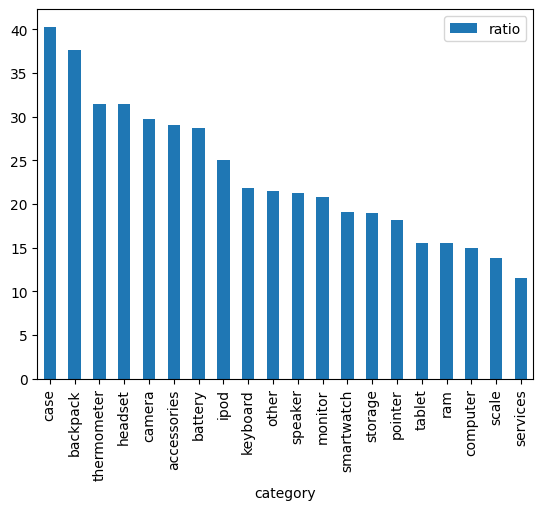

In [18]:
orlinprod_positive.groupby('category').agg({'ratio':'mean'}).nlargest(20,columns='ratio').plot.bar();

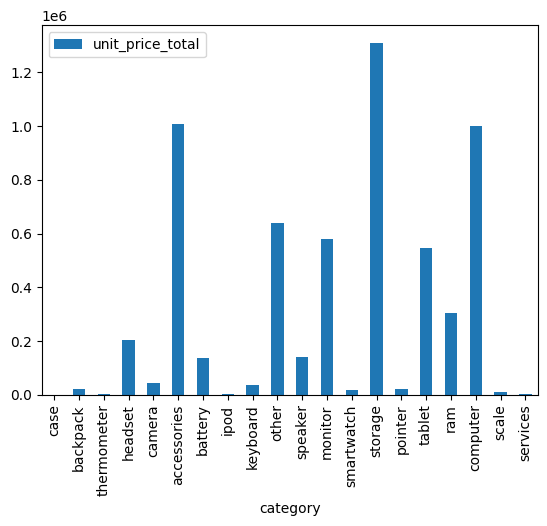

In [19]:
orlinprod_positive.groupby('category').agg({'unit_price_total':'sum','ratio':'mean'}).nlargest(20,columns='ratio').plot.bar(y='unit_price_total');

Top 10 categories with highest revenue

Text(0, 0.5, 'Unit Price Total')

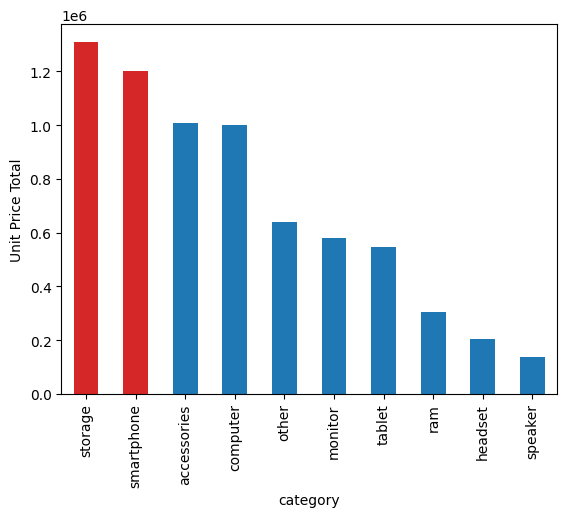

In [21]:
x_df = orlinprod_positive.groupby('category').agg({'unit_price_total': 'sum', 'ratio': 'mean'}).nlargest(10, columns='unit_price_total')
colors = ['tab:red' if category in ['storage', 'smartphone'] else 'tab:blue' for category in x_df.index]
ax = x_df.plot.bar(y='unit_price_total', color=colors, legend=False)
ax.set_ylabel('Unit Price Total')

Top 10 categories with highest discounts

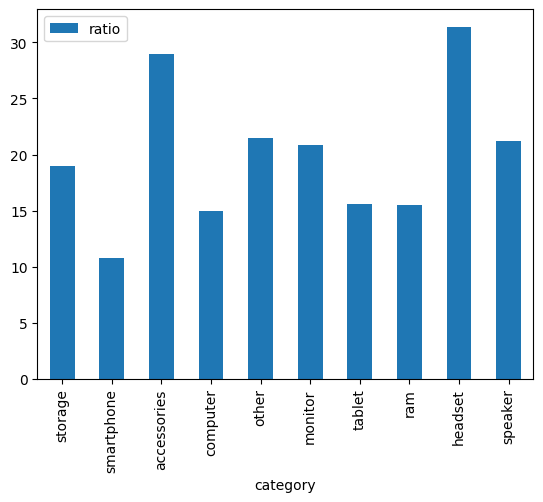

In [22]:
orlinprod_positive.groupby('category').agg({'unit_price_total':'sum','ratio':'mean'}).nlargest(10,columns='unit_price_total').plot.bar(y='ratio');

Top 10 categories with highest sold quantities (total revenue)

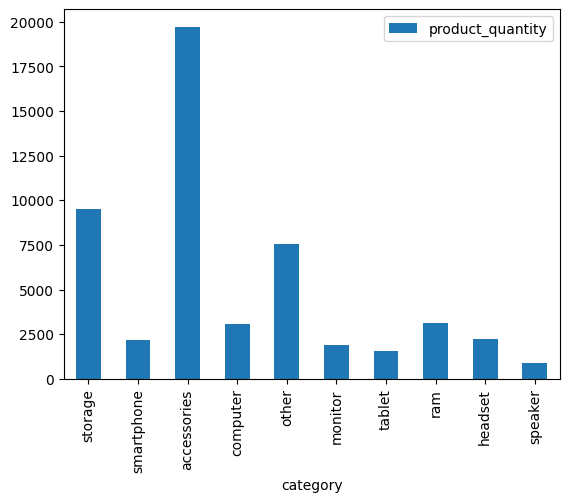

In [23]:
orlinprod_positive.groupby('category').agg({'product_quantity':'sum','unit_price_total':'sum'}).nlargest(10,columns='unit_price_total').plot.bar(y='product_quantity');

Top 10 categories with highest sold quantities (avg. revenue)

<Axes: xlabel='category'>

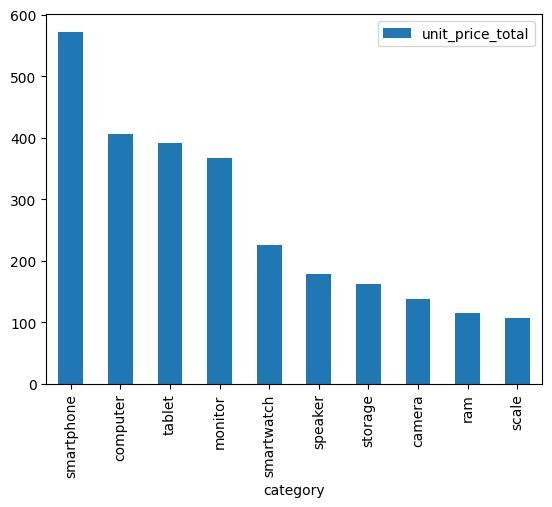

In [24]:
orlinprod_positive.groupby('category').agg({'product_quantity':'sum','unit_price_total':'mean'}).nlargest(10,columns='unit_price_total').plot.bar(y='unit_price_total')

Avg. discount percentage for smartphones over the time

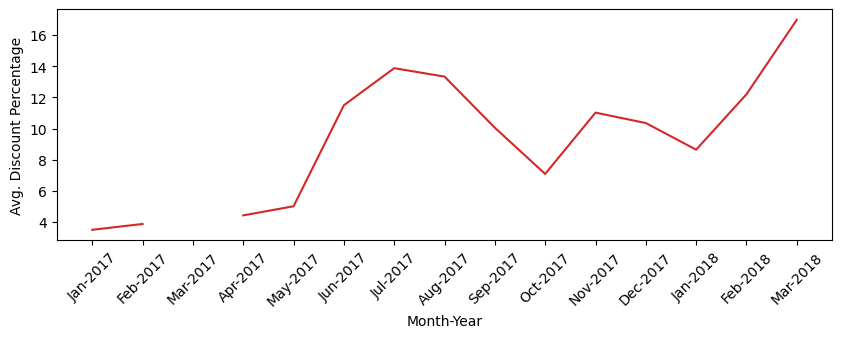

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
smartphones_df = orlinprod_positive[orlinprod_positive['category'] == 'smartphone']
smartphones_resampled = smartphones_df.resample('M', on='date')['ratio'].mean().reset_index()
smartphones_resampled['month-year'] = smartphones_resampled['date'].dt.strftime('%b-%Y')
smartphone_group = smartphones_resampled.groupby('month-year').agg({'ratio': 'mean'}).reset_index()
smartphone_group['new-date'] = pd.to_datetime(smartphone_group['month-year'], format='%b-%Y')
smartphone_group = smartphone_group.sort_values('new-date')
plt.figure(figsize=(10, 3))
plt.plot(smartphone_group['month-year'], smartphone_group['ratio'], linestyle='-', color='tab:red', label='Average Discount-Ratio')
plt.xlabel('Month-Year')
plt.ylabel('Avg. Discount Percentage')
plt.xticks(rotation=45)
plt.grid(False)

Total revenue for smartphones over the time

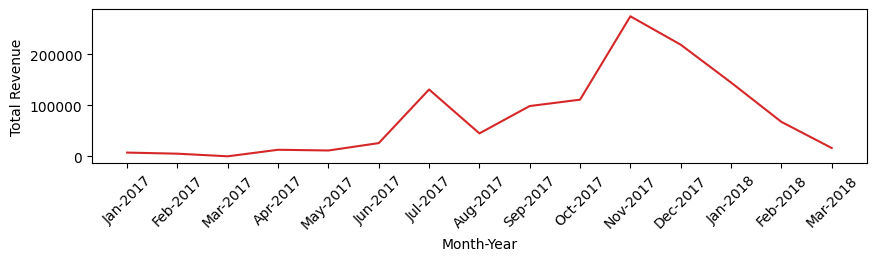

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
smartphones_df = orlinprod_positive[orlinprod_positive['category'] == 'smartphone']
smartphones_resampled = smartphones_df.resample('M', on='date')['unit_price'].sum().reset_index()
smartphones_resampled['month-year'] = smartphones_resampled['date'].dt.strftime('%b-%Y')
smartphone_group = smartphones_resampled.groupby('month-year').agg({'unit_price': 'sum'}).reset_index()
smartphone_group['new-date'] = pd.to_datetime(smartphone_group['month-year'], format='%b-%Y')
smartphone_group = smartphone_group.sort_values('new-date')
plt.figure(figsize=(10,2))
plt.plot(smartphone_group['month-year'], smartphone_group['unit_price'], linestyle='-', color='tab:red')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(False)

Avg. discount percentage for accessories over the time

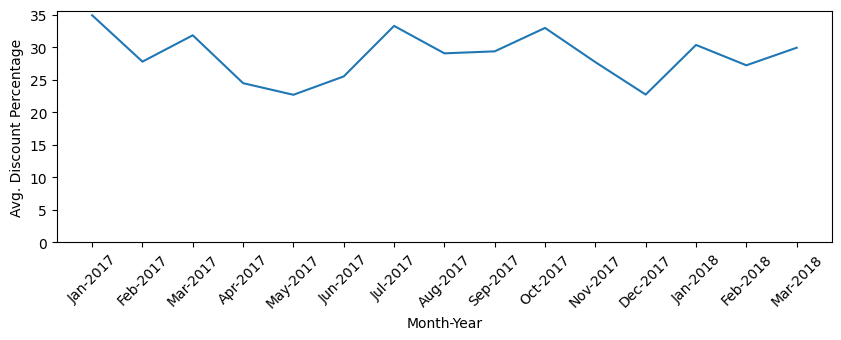

In [27]:
accessories_df = orlinprod_positive[orlinprod_positive['category'] == 'accessories']
accessories_resampled = accessories_df.resample('M', on='date')['ratio'].mean().reset_index()
accessories_resampled['month-year'] = accessories_resampled['date'].dt.strftime('%b-%Y')
accessories_group = accessories_resampled.groupby('month-year').agg({'ratio': 'mean'}).reset_index()
accessories_group['new-date'] = pd.to_datetime(accessories_group['month-year'], format='%b-%Y')
accessories_group = accessories_group.sort_values('new-date')
plt.figure(figsize=(10, 3))
plt.plot(accessories_group['month-year'], accessories_group['ratio'], linestyle='-', color='tab:blue', label='Average Discount-Ratio')

plt.xlabel('Month-Year')
plt.ylabel('Avg. Discount Percentage')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(False)

Total revenue for accessories over the time

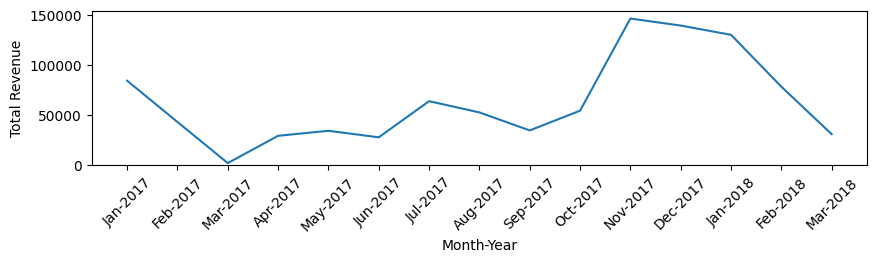

In [28]:
accessories_df = orlinprod_positive[orlinprod_positive['category'] == 'accessories']
accessories_resampled = accessories_df.resample('M', on='date')['unit_price'].sum().reset_index()
accessories_resampled['month-year'] = accessories_resampled['date'].dt.strftime('%b-%Y')
accessories_group = accessories_resampled.groupby('month-year').agg({'unit_price': 'sum'}).reset_index()
accessories_group['new-date'] = pd.to_datetime(accessories_group['month-year'], format='%b-%Y')
accessories_group = accessories_group.sort_values('new-date')
plt.figure(figsize=(10, 2))
plt.plot(accessories_group['month-year'], accessories_group['unit_price'], linestyle='-', color='tab:blue')

plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(False)

Mean discount percentage for smartphones over the time

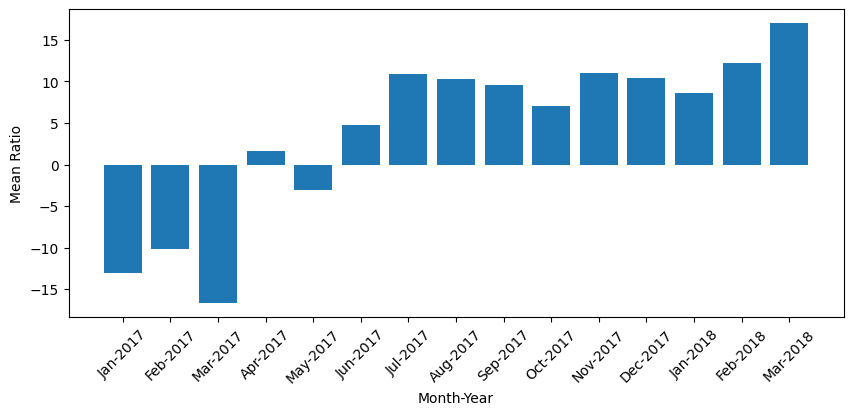

In [32]:
orlinprod_all_phones = orderlines_products.loc[orderlines_products['category']=='smartphone',:]
all_smartphone_resampled = orlinprod_all_phones.resample('M', on='date')['ratio'].mean().reset_index()
all_smartphone_resampled['month-year'] = all_smartphone_resampled['date'].dt.strftime('%b-%Y')
all_smartphone_groups = all_smartphone_resampled.groupby('month-year').agg({'ratio': 'mean'}).reset_index()
all_smartphone_groups['new-date'] = pd.to_datetime(all_smartphone_groups['month-year'], format='%b-%Y')
all_smartphone_groups = all_smartphone_groups.sort_values('new-date')



plt.figure(figsize=(10, 4))
plt.bar(all_smartphone_groups['month-year'], all_smartphone_groups['ratio'])
plt.xlabel('Month-Year')
plt.ylabel('Mean Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.grid(False)
plt.show()